Shreyas Ravi
DSC 478
Assignment 3

In [470]:
# Question 1(a)
# reading the file 
import pandas as pd 
com = pd.read_csv('communities.csv')

In [471]:
from matplotlib import pyplot as plt

In [472]:
com.shape

(1994, 100)

In [473]:
com.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [474]:
com.columns[com.isnull().sum() >0]
 # checking for empty values 

Index([], dtype='object')

In [475]:
com.dtypes[com.dtypes=='object']

communityname    object
OtherPerCap      object
dtype: object

In [476]:
com.OtherPerCap.replace({'?':nan},inplace=True)

In [477]:
com.OtherPerCap = com.OtherPerCap.astype('float')

In [478]:
com.OtherPerCap.fillna(com['OtherPerCap'].mean(),inplace=True)

In [479]:
com.isnull().sum()

state                  0
communityname          0
population             0
householdsize          0
racepctblack           0
                      ..
PctSameState85         0
LandArea               0
PopDens                0
PctUsePubTrans         0
ViolentCrimesPerPop    0
Length: 100, dtype: int64

In [480]:
y = com['ViolentCrimesPerPop']
x = com.drop(['ViolentCrimesPerPop'], axis=1)

In [481]:
x.drop(['communityname'],axis=1,inplace=True)

In [482]:
x.head()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,8,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,53,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,24,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,34,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,42,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [483]:
y.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [484]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [485]:
# question 1(b)
#from textbook
from numpy import *
def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
#     print(xMat)
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [486]:
# rmse for training data
def rmse(y_true, y_pred):
#     y_true = y_true.to_numpy().reshape(len(y_true),1)
#     y_pred = y_pred.reshape(len(y_))
    return ((square(y_true - y_pred)).mean())**0.5

In [487]:
ws = standRegres(x_train,y_train)

In [488]:
ws.shape

(98, 1)

In [489]:
x_train.shape

(1595, 98)

In [490]:
dot(x_train,ws).ravel().shape

(1, 1595)

In [491]:
y_pred = dot(x_train,ws)

In [492]:
rmse(y_train.to_numpy().reshape(1,len(y_train)), y_pred.ravel())

0.12675481388639603

In [493]:
df = x_train.copy()

In [494]:
df['y_pred'] = y_pred

In [495]:
df.head()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,y_pred
1594,34,0.06,0.49,0.27,0.69,0.09,0.19,0.35,0.42,0.26,...,0.01,0.31,0.48,0.64,0.61,0.69,0.07,0.15,0.22,0.222014
318,39,0.00,0.24,0.02,0.96,0.06,0.03,0.27,0.37,0.24,...,0.00,0.25,0.77,0.86,0.97,0.92,0.01,0.23,0.23,0.100273
992,37,0.00,0.32,0.31,0.74,0.02,0.02,0.33,0.44,0.29,...,0.00,0.03,0.83,0.63,0.78,0.79,0.02,0.12,0.02,0.308815
465,8,0.00,0.36,0.03,0.94,0.02,0.14,0.32,0.33,0.19,...,0.00,0.05,0.46,0.46,0.54,0.66,0.02,0.13,0.00,0.147118
1461,49,0.01,1.00,0.00,0.98,0.03,0.04,0.69,0.56,0.31,...,0.00,0.04,0.82,0.69,0.80,0.77,0.02,0.16,0.09,0.119241


<AxesSubplot:>

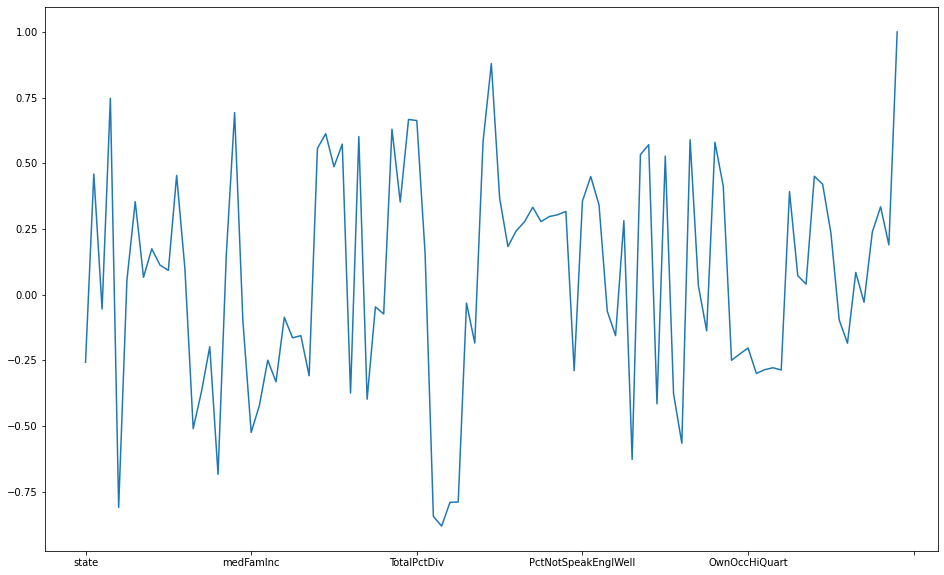

In [496]:
plt.figure(figsize = (16,10));
df.corr()['y_pred'].plot()

<Figure size 1152x720 with 0 Axes>

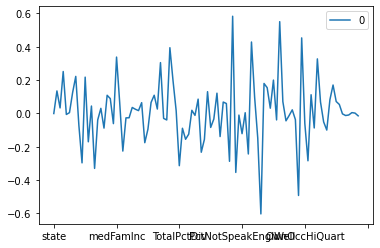

In [497]:
data = pd.DataFrame(ws.T,columns=list(x_train.columns)).T
plt.figure(figsize = (16,10))
data.plot();

In [498]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [499]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [500]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
print(-1*cross_val_score(lr, x_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1))

[0.1477015  0.111358   0.1285153  0.14395786 0.13821979 0.14042417
 0.14909716 0.12434912 0.12355891 0.15223731]


0.126 vs smallest rmse of 0.111 (small difference, slightly better)

In [501]:
#Question 1(c)
from sklearn import feature_selection

In [ ]:
# fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=30)
# x_train_fs = fs.fit_transform(x_train, y_train)

In [502]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import numpy as np

1 -0.11248639351171645
6 -0.1013625524556802
11 -0.101508709723509
16 -0.1010376088316293
21 -0.09839040692427371
26 -0.09625161088708392
31 -0.09630403156985567
36 -0.09547844819798205
41 -0.09544221858116658
46 -0.09587587149953249
51 -0.09629495931627736
56 -0.09654060644909987
61 -0.09662160822890485
66 -0.09686496377553051
71 -0.09718269887509014
76 -0.09646245138619773
81 -0.0968532907069389
86 -0.09672715515885308
91 -0.09666889671669866
96 -0.09632068114569628
8
Optimal percentile of features:41 

Optimal number of features:40 



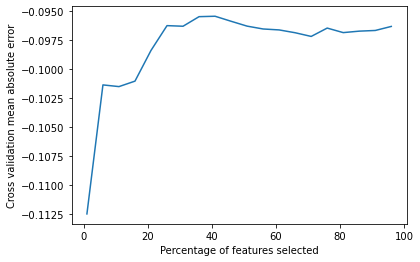

In [503]:
reg = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    scores = model_selection.cross_val_score(reg, x_train_fs, y_train, cv=5, scoring = 'neg_mean_absolute_error')
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
print(optimal_percentile[0])
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile[0]]), "\n")
optimal_num_features = int(percentiles[optimal_percentile[0]]*len(x.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation mean absolute error")
pl.plot(percentiles,results)

From the above we can see the cross validation mean absolute error plotted aginst the percentage of features selected. From this plot we can see that the idea number of features selected would be at around 40 features as this is where the cv mean absolute error is the lowest, compared to the rest. After 40 features the error seems to slightly increase again, making them not ideal percentage of features to be selected. 

In [504]:
# Question 1(d)
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print (param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        #cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        cv = KFold(n_splits=K)
        cv.get_n_splits(X) 
        cv = KFold(n_splits=K,random_state=None, shuffle=False)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv.split(X)):
            # fit the regression in the corresponding fold
            # and obtain the corresponding mae scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = mean_absolute_error(clf.predict([X[k] for k in train]), y[train])
            k_test_scores[j] = mean_absolute_error(clf.predict([X[k] for k in test]), y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("MAE")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

alpha  =  0.0


/var/folders/2m/jcjlh17n5tzctdvfqpkgtx3w0000gn/T/ipykernel_64243/2915930358.py:36: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  clf.fit([X[k] for k in train], y[train])
/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.263362747411104, tolerance: 0.006965547899686525
  model = cd_fast.enet_coordinate_descent(
/var/folders/2m/jcjlh17n5tzctdvfqpkgtx3w0000gn/T/ipykernel_64243/2915930358.py:36: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the 

alpha  =  0.1
alpha  =  0.2
alpha  =  0.30000000000000004
alpha  =  0.4
alpha  =  0.5
alpha  =  0.6000000000000001
alpha  =  0.7000000000000001
alpha  =  0.8
alpha  =  0.9
alpha  =  1.0


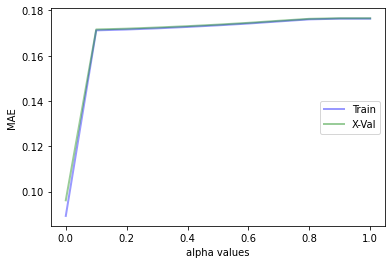

In [505]:
from sklearn import linear_model

lasso = linear_model.Lasso()
alpha = np.linspace(0.0, 1.0, 11)

ridge = linear_model.Ridge()

train_scores, test_scores = calc_params(x_train, y_train, lasso, alpha, 'alpha', 5)

alpha  =  1.0
alpha  =  12.0
alpha  =  23.0
alpha  =  34.0
alpha  =  45.0
alpha  =  56.0
alpha  =  67.0
alpha  =  78.0
alpha  =  89.0
alpha  =  100.0


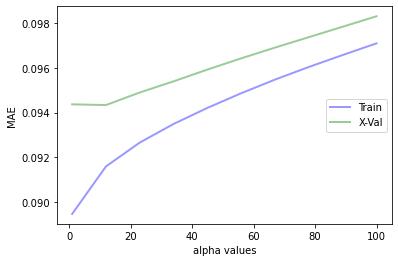

In [506]:
alpha = np.linspace(1,100,10)
train_scores, test_scores = calc_params(x_train, y_train, ridge, alpha, 'alpha', 5)

In the above plot we can see that the mean absolute error icreases with an increase in alpha value for both the training set and the validation set. We can see that the MAE for both train set and X-Val are smallest at alpha = 1. 

In [507]:
lasso1 = linear_model.Lasso(alpha=0)
ridge1 = linear_model.Ridge(alpha=1)
lasso1.fit(x_train, y_train)
ridge1.fit(x_train, y_train)

/var/folders/2m/jcjlh17n5tzctdvfqpkgtx3w0000gn/T/ipykernel_64243/750423391.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso1.fit(x_train, y_train)
/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.774918597227424, tolerance: 0.008445817278996867
  model = cd_fast.enet_coordinate_descent(


Ridge(alpha=1)

In [508]:
lasso1_pred = lasso1.predict(x_test)
ridge1_pred = ridge1.predict(x_test)

In [509]:
# Question 1 (e)
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
x_sgd_train, x_sgd_test, y_sgd_train, y_sgd_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [510]:
# performing scaling 
scaler = StandardScaler()
scaler.fit(x_sgd_train, y_sgd_train)

StandardScaler()

In [511]:
# fitting SGD model 
sgd = SGDRegressor()
sgd = sgd.fit(x_sgd_train, y_sgd_train)

In [512]:
from sklearn.metrics import accuracy_score

In [513]:
# using GridSearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

sgd2 = SGDRegressor()
clf = GridSearchCV(sgd2, parameters, cv=5, n_jobs=-1)
clf.fit(x_sgd_train, y_sgd_train)


GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']})

In [514]:
best_estimator=clf.best_estimator_
best_estimator
# no penalty mentioned therefore we assume it picks the default which is l2

SGDRegressor(alpha=10, penalty='l1')

In [515]:
sgd3 = SGDRegressor(alpha=10, penalty='l2')
sgd3 = sgd3.fit(x_sgd_test, y_sgd_test)

In [516]:
sgd3_pred=sgd3.predict(x_sgd_test)

In [517]:
metrics.mean_squared_error(y_sgd_train, sgd3.predict(x_sgd_train))**0.5 
#train rmse 

0.3102671399899244

In [518]:
from sklearn import metrics
metrics.mean_squared_error(y_sgd_test, sgd3_pred)**0.5 
#test rmse 

0.321444544612878

l1_ratio  =  0.0
l1_ratio  =  0.1
l1_ratio  =  0.2
l1_ratio  =  0.30000000000000004
l1_ratio  =  0.4
l1_ratio  =  0.5
l1_ratio  =  0.6000000000000001
l1_ratio  =  0.7000000000000001
l1_ratio  =  0.8
l1_ratio  =  0.9
l1_ratio  =  1.0


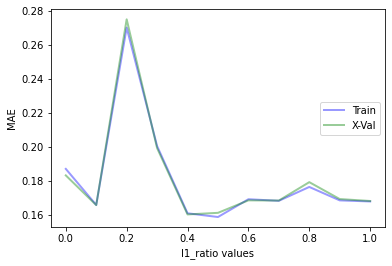

In [519]:
sgd_1 = SGDRegressor(alpha=10, penalty='l2')
l1_ratio = np.linspace(0.0, 1.0, 11)
train_scores, test_scores = calc_params(x_sgd_train, y_sgd_train, sgd_1, l1_ratio, 'l1_ratio', K=5)

In [520]:
print(train_scores)

[0.1870914  0.16584321 0.27033325 0.20052739 0.16093014 0.15874065
 0.16921215 0.16828207 0.17644492 0.16853526 0.1679039 ]


0.2 seems to have the lowest mean absolute error which mean it would be the best choice for the l1_ratio value

In [521]:
import kMeans

In [522]:
import numpy as np

In [523]:
# question 2
classes = pd.read_csv('classes.txt', header=None, skiprows=1, delim_whitespace=True)
terms = pd.read_csv('terms.txt',header=None)
matrix = pd.read_csv('matrix.txt', header=None)
classes.shape

(2500, 2)

In [524]:
matrix.shape

(9328, 2500)

In [525]:
classes.shape

(2500, 2)

In [526]:
matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [527]:
# question 2(a)
def cosine_sim(vec_a, vec_b):
    return (np.dot(vec_a, vec_b)/(np.linalg.norm(vec_a) * np.linalg.norm(vec_b)))

In [528]:
def cosine_dis(vec_a, vec_b):
    return 1-(np.dot(vec_a, vec_b)/(np.linalg.norm(vec_a) * np.linalg.norm(vec_b)))

In [529]:
# question2(b)
matrix_t = matrix.T
matrix_t.columns = terms[0].tolist()
x_train, x_test, y_train, y_test = train_test_split(matrix_t, classes[1], test_size=0.2)

In [530]:
x_train.shape

(2000, 9328)

In [531]:
y_train.shape

(2000,)

In [532]:
# define a function that would calculate IDF (from tf IDF)
def inverse_docf(dataset):
    N=float(dataset.shape[0])
    nk=np.count_nonzero(dataset, axis=0).astype('float') # axis = 1 -> only counts column sum
    idf = np.log(N/nk)
    return idf

In [536]:
x_tfidf = x_train * inverse_docf(x_train)

/var/folders/2m/jcjlh17n5tzctdvfqpkgtx3w0000gn/T/ipykernel_64243/1093838512.py:5: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(N/nk)


In [537]:
x_tfidf.shape

(2000, 9328)

In [538]:
x_tfidf.fillna(0.0, inplace=True)

In [539]:
x_tfidf

,aa,aargh,aaron,aaronc,ab,abandon,abc,abid,abil,abl,...,zq,zr,zrb,zs,zu,zubov,zv,zw,zx,zz
1626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,12.429216,0.0,0.0,0.0,0.0
2274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.666429,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
#question 2c

In [540]:
centroids = []
asess = []
for k in [4,5,6,7,8]:
    train_df = x_tfidf.to_numpy()
    i, j = kMeans.kMeans(train_df, k, distMeas=cosine_dis)
    centroids.append(i)
    asess.append(j)

In [541]:
#question 2d
def kMeans_predict(centroids, x):
    y_pred =[]
    min_dist = 1000000
    for i in centroids:
        if cosine_dis(np.logical_and(i,x))<min_dist:
            min_dist = cosine_dis(i,x)
            nearest_cent = i
        return i, min_dist

In [542]:
train_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
metrics.homogeneity_score(kMeans_predict(centroids, x_tfidf))

In [ ]:
metrics.completeness_score(y_train, kMeans_predict(centroids, x_tfidf))

In [454]:
x_test_tfidf = x_test * inverse_docf(x_test)

/var/folders/2m/jcjlh17n5tzctdvfqpkgtx3w0000gn/T/ipykernel_64243/1093838512.py:5: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(N/nk)


In [ ]:
#question 2e
cent_test = []
dist = []

for i in x_test_tfidf:
    a,b = kMeans_predict(centroids,i)
    cent_test.append(a)
    dist.append(b)
    
print(cent_test, dist)